# Deskripsi Library Yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi Memanggil Dataset

In [2]:
df = pd.read_csv('Used_Bikes.csv')

# <font color = FA0A0A> BUSINESS UNDERSTANDING </font>
Proyek ini bertujuan untuk memahami masalah bisnis, yaitu bagaimana meningkatkan akurasi estimasi harga sepeda agar dapat memberikan informasi yang lebih akurat bagi pelanggan dan membantu perusahaan dalam pengambilan keputusan bisnis yang lebih baik.

# <font color = FA0A0A> DATA UNDERSTANDING </font>
- bike_name : Nama Sepeda
- price : Harga Jual Sepeda
- city : Kota Asal Sepeda
- kms_driven : Jarak Tempuh Sepeda
- owner : Pemilik Sepeda
- age : Umur Sepeda
- power : Kecepatan Sepeda
- brand : Merek Sepeda

In [3]:
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


# <font color = FA0A0A> DATA PREPARATION </font>

# Merubah Data Menjadi Integer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [5]:
df.isna().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

<Axes: >

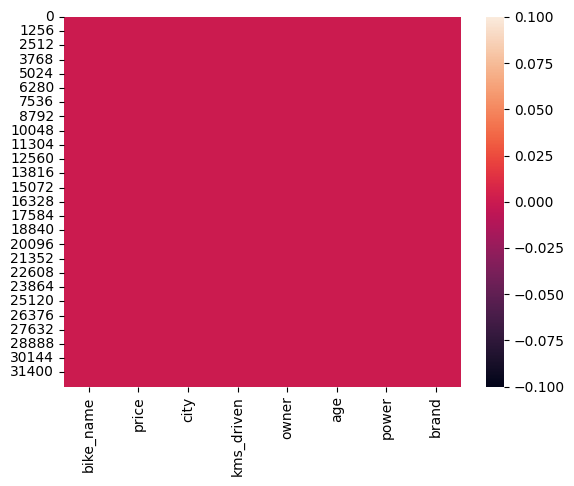

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


C:\Users\62813\AppData\Local\Temp\ipykernel_6236\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

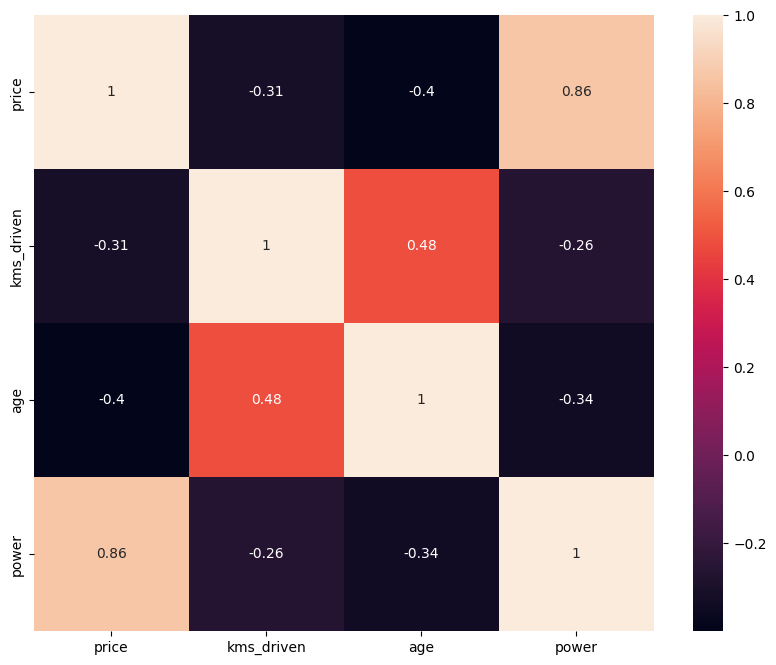

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

# Jumlah Sepeda Berdasarkan Model

In [9]:
models = df.groupby('brand').count()[['power']].sort_values(by='power',ascending=True).reset_index()
models = models.rename(columns={'power':'numberOfBikes'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Yezdi'),
  Text(1, 0, 'Rajdoot'),
  Text(2, 0, 'LML'),
  Text(3, 0, 'Ideal'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'MV'),
  Text(6, 0, 'Jawa'),
  Text(7, 0, 'BMW'),
  Text(8, 0, 'Ducati'),
  Text(9, 0, 'Triumph'),
  Text(10, 0, 'Mahindra'),
  Text(11, 0, 'Benelli'),
  Text(12, 0, 'Hyosung'),
  Text(13, 0, 'Kawasaki'),
  Text(14, 0, 'Harley-Davidson'),
  Text(15, 0, 'KTM'),
  Text(16, 0, 'TVS'),
  Text(17, 0, 'Suzuki'),
  Text(18, 0, 'Honda'),
  Text(19, 0, 'Yamaha'),
  Text(20, 0, 'Royal Enfield'),
  Text(21, 0, 'Hero'),
  Text(22, 0, 'Bajaj')])

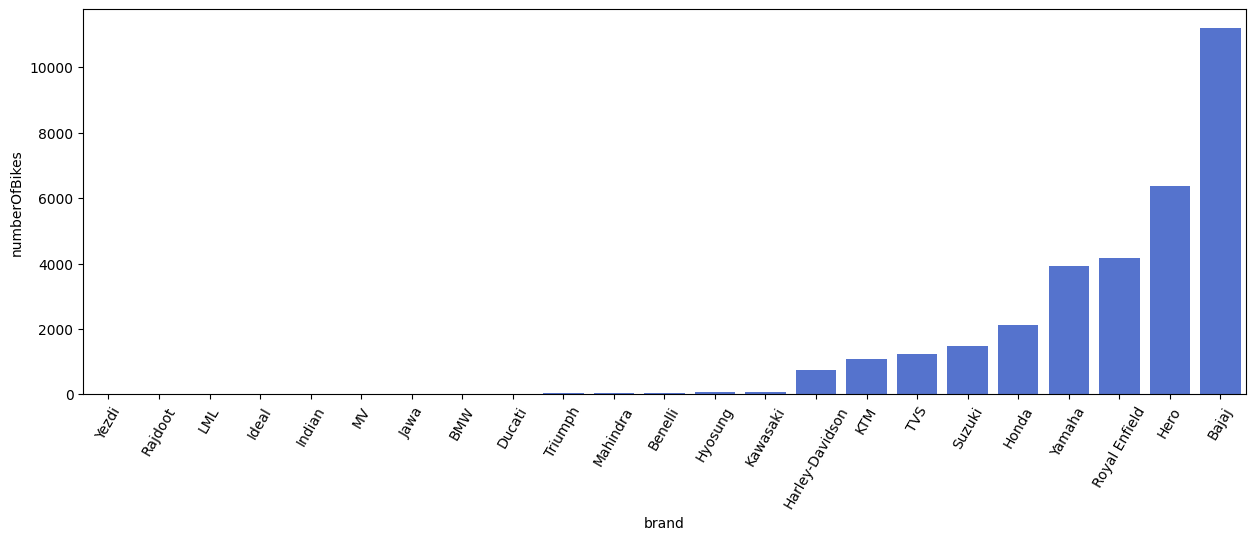

In [10]:
fig = plt.figure(figsize=(15,5)),
sns.barplot(x=models['brand'], y=models['numberOfBikes'], color='royalblue')
plt.xticks(rotation=60)

# Distribusi Jarak


C:\Users\62813\AppData\Local\Temp\ipykernel_6236\1913419165.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['kms_driven'])


<Axes: xlabel='kms_driven', ylabel='Density'>

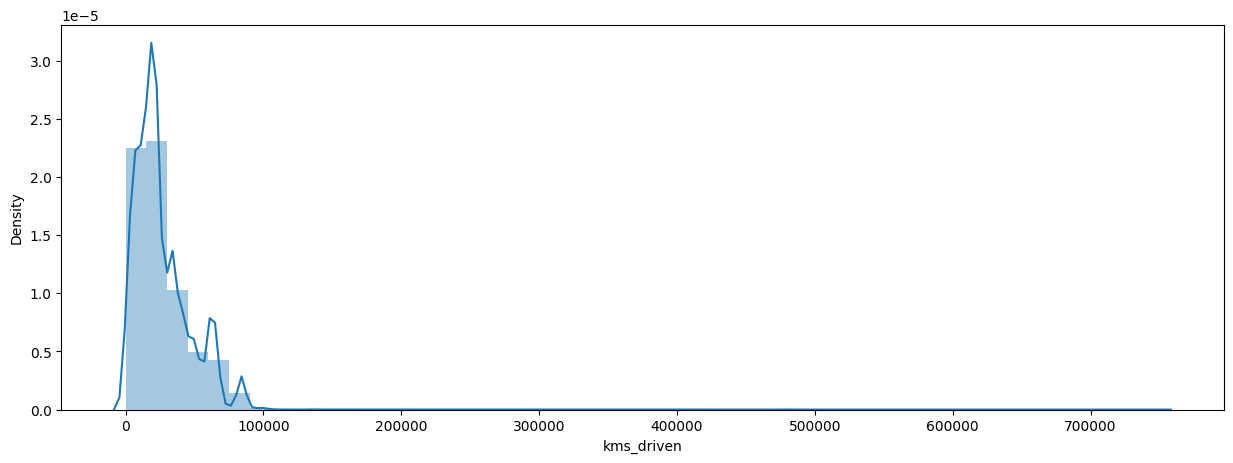

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(df['kms_driven'])

# Distribusi Harga Sepeda

C:\Users\62813\AppData\Local\Temp\ipykernel_6236\3048279456.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

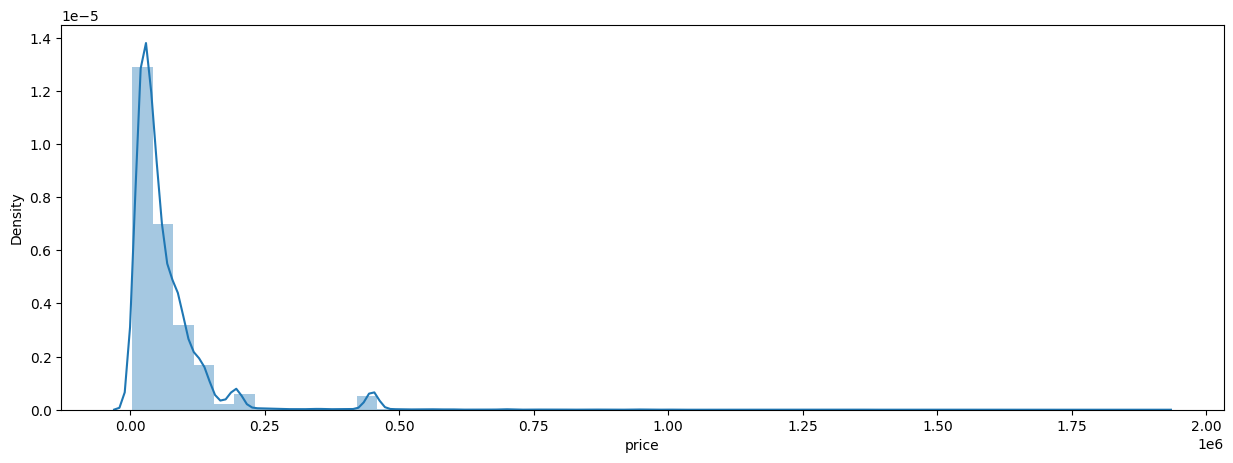

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(df['price'])

# <font color = FA0A0A> MODELING </font>

# Seleksi Fitur

In [13]:
features = ['kms_driven','age','power']
x = df[features]
y = df['price']
x.shape, y.shape

((32648, 3), (32648,))

# Split Data Training dan Data Testing

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(8162,)

# Membuat Model Regresi Linier

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

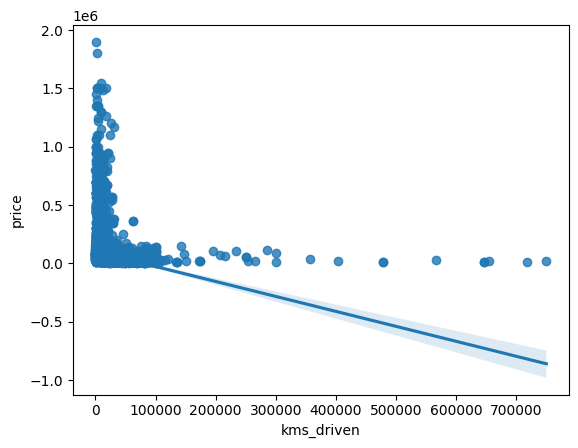

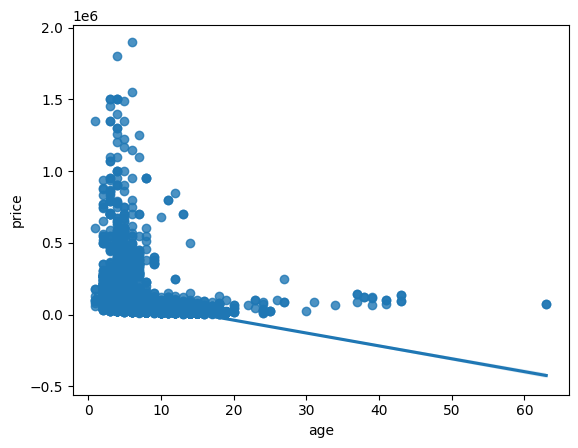

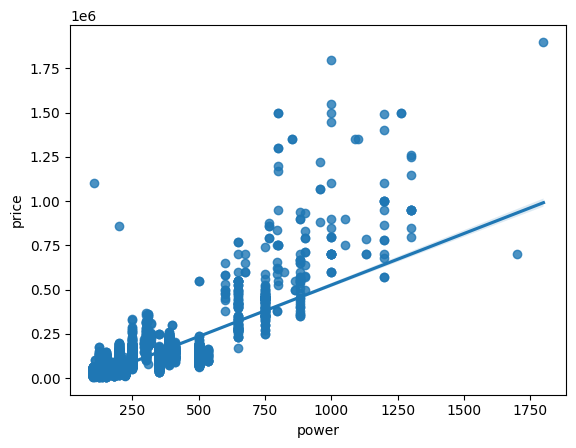

In [16]:

for features in df:
    if features in ['bike_name','price','city','owner','brand']:
        continue
    
    sns.regplot(y=df['price'],x=df[features])
    plt.show()

# <font color = FA0A0A> EVALUATION MODEL </font>

In [17]:
score = lr.score(x_test, y_test)
print('akurasi model regresi linear = ', score)

akurasi model regresi linear =  0.7659800567831423


# Membuat Inputan Model Regresi linear

In [18]:
# kms_driven= 8200, age=3, power= 160
input_data = np.array([[8200,3,160]])

prediction = lr.predict(input_data)
print('Estimasi Harga Sepeda = ', prediction)

Estimasi Harga Sepeda =  [53621.52311653]


c:\Users\62813\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color = FA0A0A> DEPLOYMENT </font>

# Simpan Model

In [19]:
import pickle

filename = 'estimasi_bikes.sav'
pickle.dump(lr,open(filename,'wb'))

# Streamlit
https://putrinthsya-streamlit-harga-sepeda-estimasi-bikes-uv6493.streamlit.app/